In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'phate>=1.0' distribution was not found and is required by the application


In [2]:
adata = ov.read('/home/lugli/spuccio/Projects/SP039/GBmap/Neftel2019_Part1.h5ad')

In [3]:
ov.single.batch_correction(adata,batch_key='donor_id',
                                        methods='harmony',n_pcs=50)
adata

...Begin using harmony to correct batch effect


2025-03-28 15:56:37,090 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-28 15:56:39,945 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-28 15:56:40,005 - harmonypy - INFO - Iteration 1 of 10
2025-03-28 15:56:43,704 - harmonypy - INFO - Iteration 2 of 10
2025-03-28 15:56:47,363 - harmonypy - INFO - Iteration 3 of 10
2025-03-28 15:56:52,097 - harmonypy - INFO - Iteration 4 of 10
2025-03-28 15:56:55,859 - harmonypy - INFO - Iteration 5 of 10
2025-03-28 15:56:59,618 - harmonypy - INFO - Iteration 6 of 10
2025-03-28 15:57:03,567 - harmonypy - INFO - Converged after 6 iterations


AnnData object with n_obs × n_vars = 17414 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'schema_version', 'title', 'umap'
    obsm: 'X_pca', 'X_umap

In [10]:
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)


In [12]:
%%time
ov.pp.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:13)
CPU times: user 15.4 s, sys: 9.59 s, total: 25 s
Wall time: 13.8 s


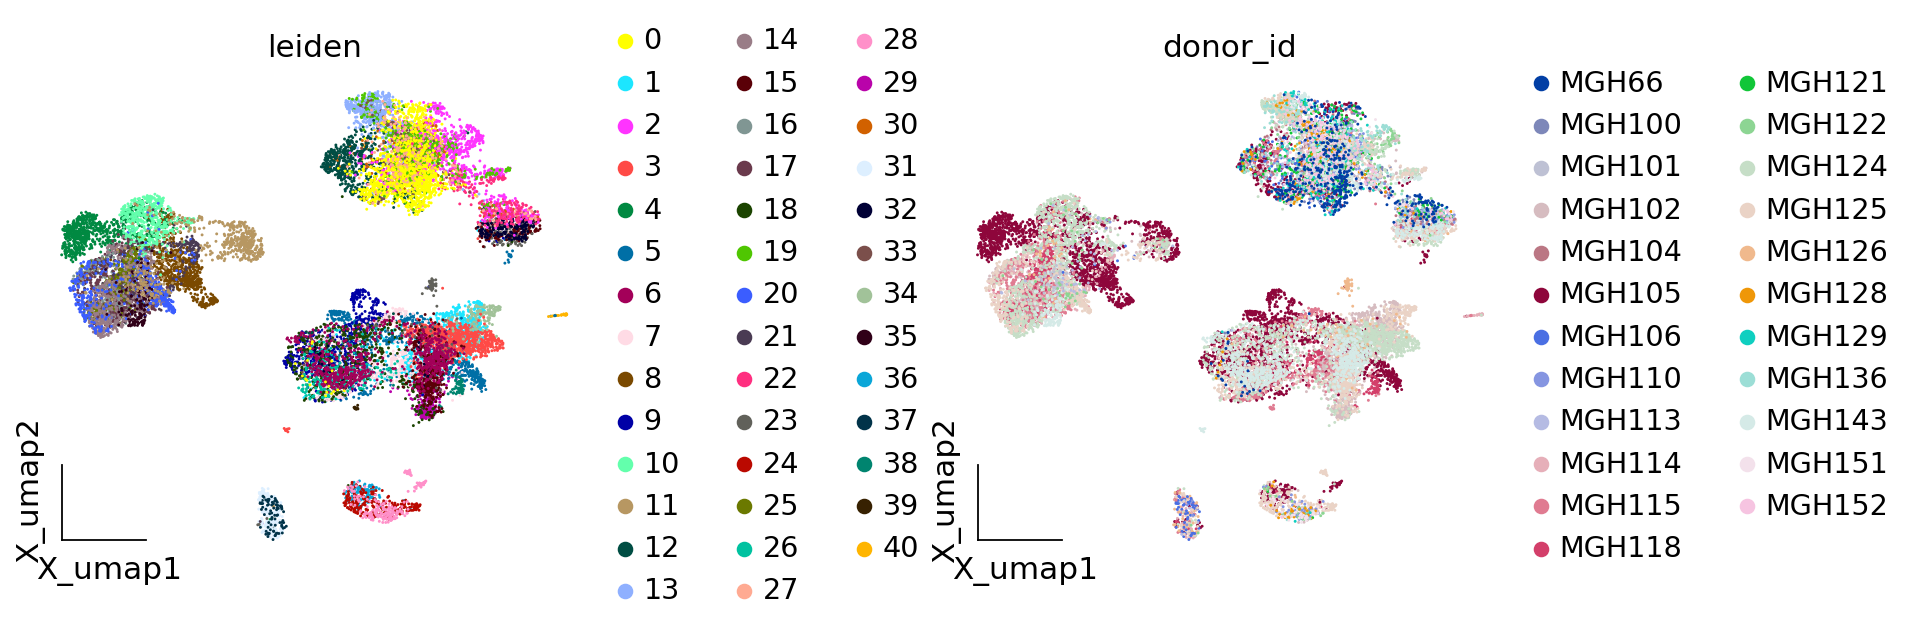

In [13]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [16]:
ov.pp.leiden(adata,resolution=0.5)

running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


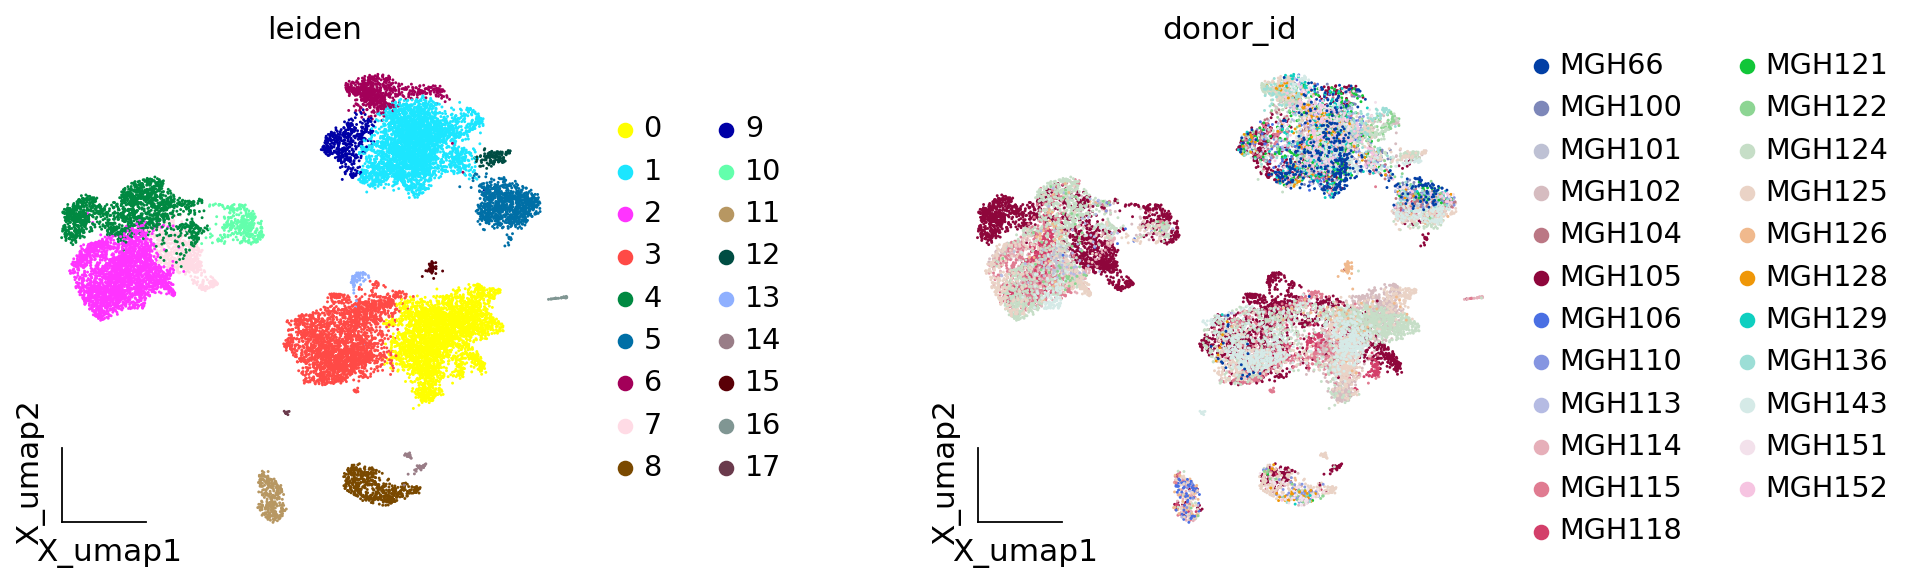

In [17]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [33]:
scsa=ov.single.pySCSA(adata=adata,
                      foldchange=1.5,
                      pvalue=0.01,
                      celltype='normal',
                      target='cellmarker',
                      tissue='Brain',
                      model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'                    
)

In [34]:
anno=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:00:32)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 693
Other Gene number: 1052
Cluster 1 Gene number: 7372
Other Gene number: 1009
Cluster 10 Gene number: 3142
Other Gene number: 1040
Cluster 11 Gene number: 508
Other Gene number: 1033
Cluster 12 Gene number: 5734
Other Gene number: 1058
Cluster 13 Gene number: 129
Other Gene number: 1061
Cluster 14 Gene number: 2516
Other Gene number: 1060
Cluster 15 Gene number: 126
Other Gene number: 1058
Cluster 16 Gene number: 308
Other Gene number: 1059
Cluster 17 Gene number: 660
Other Gene number: 1060
Cluster 2 Gene number: 1147
Other Gene number: 1061
Cluster 3 Gene number: 841

In [35]:
scsa.cell_auto_anno(adata,key='scsa_celltype_cellmarker')

...cell type added to scsa_celltype_cellmarker on obs of anndata


In [36]:
scsa=ov.single.pySCSA(adata=adata,
                          foldchange=1.5,
                          pvalue=0.01,
                          celltype='normal',
                          target='panglaodb',
                          tissue='Brain',
                          model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'
                          
)

In [37]:
res=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:00:31)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 693
Other Gene number: 4106
Cluster 1 Gene number: 7372
Other Gene number: 3900
Cluster 10 Gene number: 3142
Other Gene number: 4052
Cluster 11 Gene number: 508
Other Gene number: 4076
Cluster 12 Gene number: 5734
Other Gene number: 4151
Cluster 13 Gene number: 129
Other Gene number: 4161
Cluster 14 Gene number: 2516
Other Gene number: 4149
Cluster 15 Gene number: 126
Other Gene number: 4151
Cluster 16 Gene number: 308
Other Gene number: 4150
Cluster 17 Gene number: 660
Other Gene number: 4152
Cluster 2 Gene number: 1147
Other Gene number: 4138
Cluster 3 Gene number: 841

In [38]:
scsa.cell_anno_print()

Cluster:0	Cell_type:Neurons|Interneurons	Z-score:3.887|3.43
Cluster:1	Cell_type:Interneurons|Neurons	Z-score:2.835|2.411
Cluster:2	Cell_type:Macrophages|Microglia	Z-score:3.65|3.532
Cluster:3	Cell_type:Fibroblasts|Hepatic Stellate Cells	Z-score:3.674|2.757
Cluster:4	Cell_type:Macrophages|Monocytes	Z-score:3.549|3.248
Nice:Cluster:5	Cell_type:Pluripotent Stem Cells	Z-score:7.149
Cluster:6	Cell_type:Neurons|Interneurons	Z-score:4.234|4.08
Cluster:7	Cell_type:Macrophages|Dendritic Cells	Z-score:3.259|3.019
Nice:Cluster:8	Cell_type:Oligodendrocytes	Z-score:8.588
Cluster:9	Cell_type:Endothelial Cells (Aorta)|Podocytes	Z-score:2.972|2.876
Cluster:10	Cell_type:Macrophages|Microglia	Z-score:3.917|3.656
Cluster:11	Cell_type:T Cells|NK Cells	Z-score:3.692|3.442
Cluster:12	Cell_type:Pluripotent Stem Cells|Reticulocytes	Z-score:5.472|3.892
Cluster:13	Cell_type:Bergmann Glia|Astrocytes	Z-score:4.472|3.633
Nice:Cluster:14	Cell_type:Oligodendrocytes	Z-score:8.169
Nice:Cluster:15	Cell_type:Erythroid-l

In [39]:
scsa.cell_auto_anno(adata,key='scsa_celltype_panglaodb')

...cell type added to scsa_celltype_panglaodb on obs of anndata


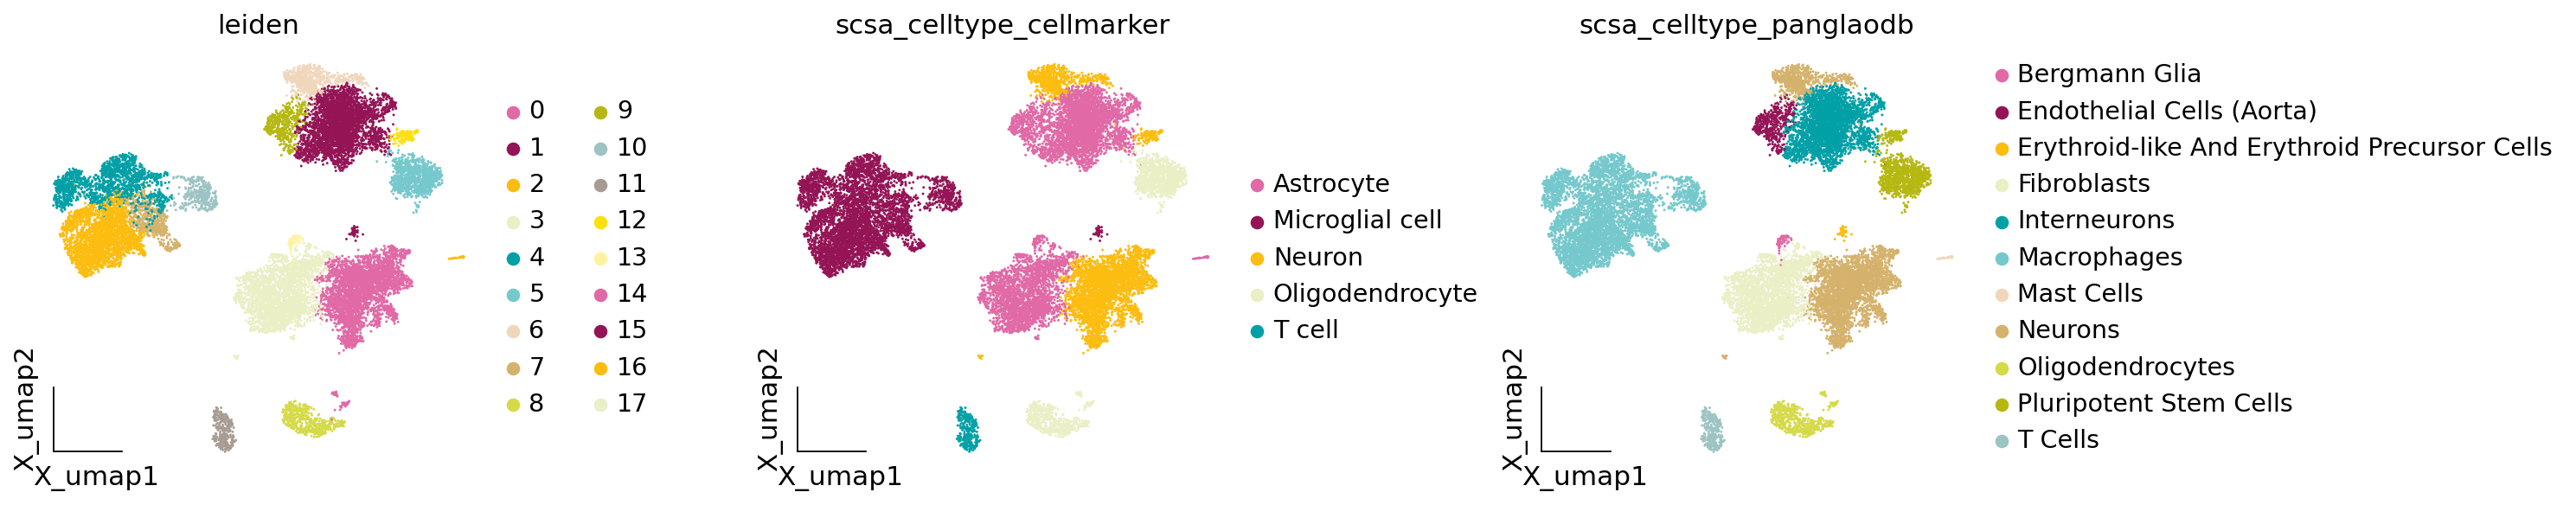

In [47]:
ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['leiden','scsa_celltype_cellmarker','scsa_celltype_panglaodb'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

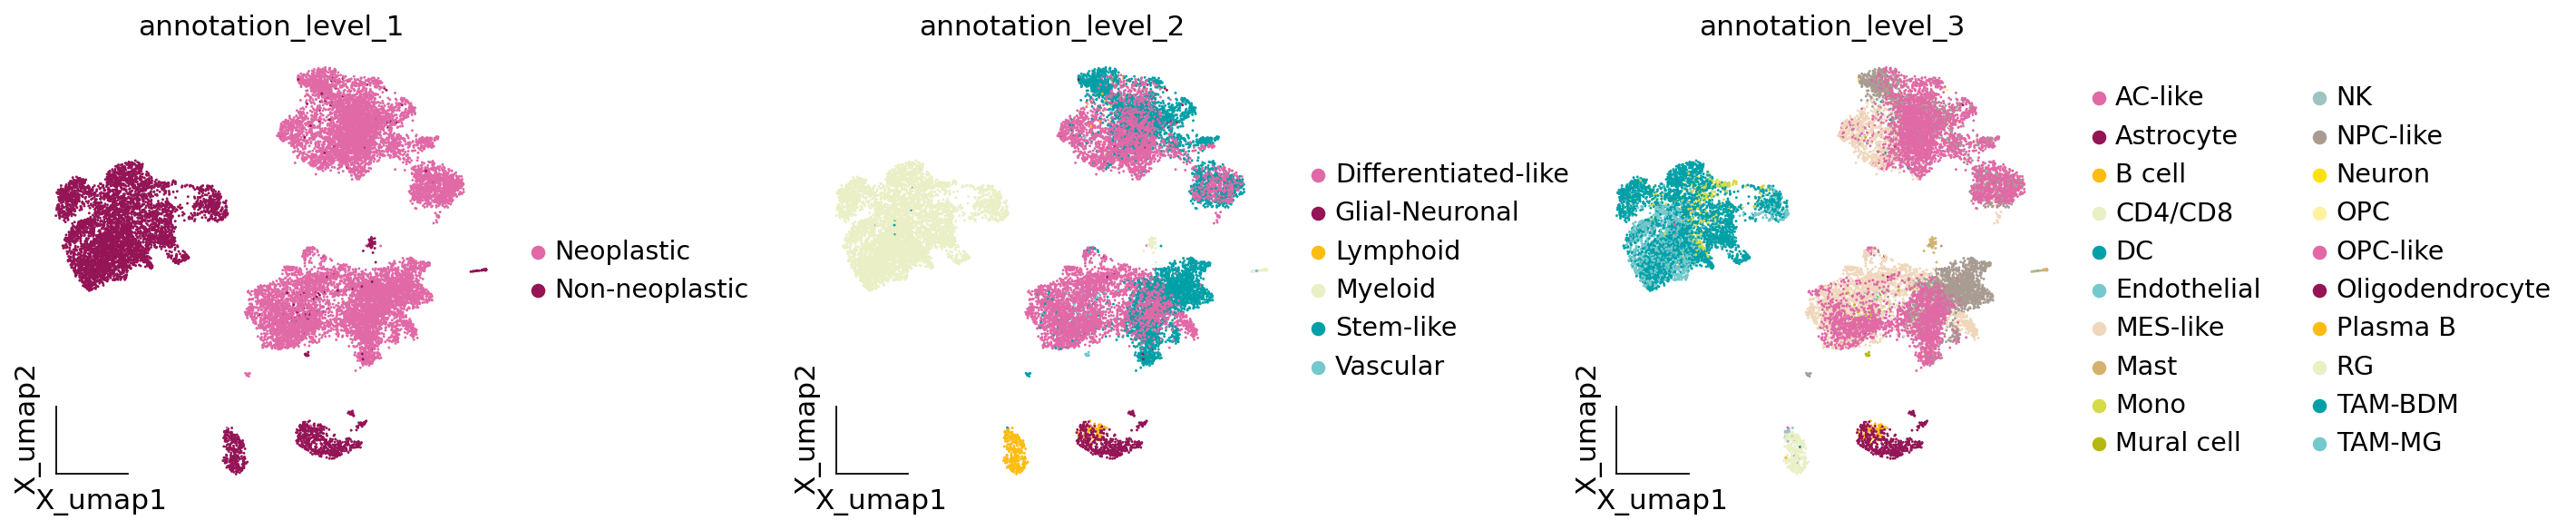

In [53]:
ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['annotation_level_1','annotation_level_2','annotation_level_3'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

In [50]:
adata

AnnData object with n_obs × n_vars = 17414 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'scsa_celltype_cellmarker', 'scsa_celltype_panglaodb'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'sche

In [54]:
del adata.obs['is_primary_data']

In [56]:
del adata.obs['gbmap']

In [61]:
del adata.obs['tissue_ontology_term_id']

In [66]:
adata.write("/home/lugli/spuccio/Projects/SP039/GBmap/Neftel2019_Part2.h5ad")